In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv("loan_train.csv")
test_data = pd.read_csv("loan_test.csv")

In [42]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,573354,737474,10000,10000,9950.00000,36 months,7.51%,311.11,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,476321,603324,15000,15000,14800.00000,36 months,8.94%,476.58,A,A5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,451484,556265,2000,2000,2000.00000,36 months,13.57%,67.94,C,C3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1018129,1246557,35000,35000,33951.84413,60 months,20.89%,944.71,F,F1,...,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN
4,800018,1005270,14000,14000,14000.00000,60 months,17.49%,351.64,D,D5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [43]:
data.shape

(24999, 111)

In [44]:
#Finding the missing values
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        17
tot_hi_cred_lim               24999
total_bal_ex_mort             24999
total_bc_limit                24999
total_il_high_credit_limit    24999
Length: 111, dtype: int64

In [45]:
#Percentage of missing value
data.isnull().sum()/data.shape[0]

id                            0.00000
member_id                     0.00000
loan_amnt                     0.00000
funded_amnt                   0.00000
funded_amnt_inv               0.00000
                               ...   
tax_liens                     0.00068
tot_hi_cred_lim               1.00000
total_bal_ex_mort             1.00000
total_bc_limit                1.00000
total_il_high_credit_limit    1.00000
Length: 111, dtype: float64

In [46]:
# Check for duplicates
data.duplicated().sum()

0

In [47]:
# Find any garbadge value
for i in data.select_dtypes(include="object"):
    print(data[i].value_counts())
    print("***"*10)

term
36 months    18203
60 months     6796
Name: count, dtype: int64
******************************
int_rate
10.99%    602
13.49%    520
11.49%    499
7.51%     496
7.88%     476
         ... 
18.36%      1
14.75%      1
16.20%      1
19.16%      1
16.15%      1
Name: count, Length: 361, dtype: int64
******************************
grade
B    7497
A    6293
C    5090
D    3431
E    1804
F     678
G     206
Name: count, dtype: int64
******************************
sub_grade
A4    1831
B3    1777
A5    1757
B5    1732
B4    1573
C1    1338
B2    1290
C2    1267
B1    1125
A3    1107
C3     959
A2     912
D2     885
C4     771
D3     757
C5     755
A1     686
D4     609
D1     599
D5     581
E1     491
E2     412
E3     358
E4     292
E5     251
F1     224
F2     162
F3     113
F4     110
F5      69
G1      64
G2      50
G4      39
G3      34
G5      19
Name: count, dtype: int64
******************************
emp_title
Bank of America                           109
IBM                       

In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,24999.0,682473.153286,209488.606494,55742.0,516533.0,664737.0,835525.5,1076863.0
member_id,24999.0,849838.779951,264256.395138,73673.0,667220.0,849671.0,1044731.5,1304884.0
loan_amnt,24999.0,11262.498500,7391.976258,500.0,5562.5,10000.0,15000.0,35000.0
funded_amnt,24999.0,10985.099404,7123.122668,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt_inv,24999.0,10435.344410,7064.113430,0.0,5000.0,9000.0,14400.0,35000.0
...,...,...,...,...,...,...,...,...
tax_liens,24982.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
data.describe(include="object")

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,24999,24999,24999,24999,24993,24958,24999,24999,24999,24999,...,24991,24999,24999,24999,24970,24999,24954,698,24999,24999
unique,2,361,7,35,19952,11,4,3,55,3,...,12893,787,50,495,1059,1,101,2,102,1
top,36 months,10.99%,B,A4,Bank of America,10+ years,RENT,Not Verified,11-Dec,Fully Paid,...,Debt Consolidation,100xx,CA,Nov-98,0%,f,16-May,16-Jun,16-May,INDIVIDUAL
freq,18203,602,7497,1831,109,5565,12034,10762,1426,20827,...,1407,409,4414,246,606,24999,769,688,6530,24999


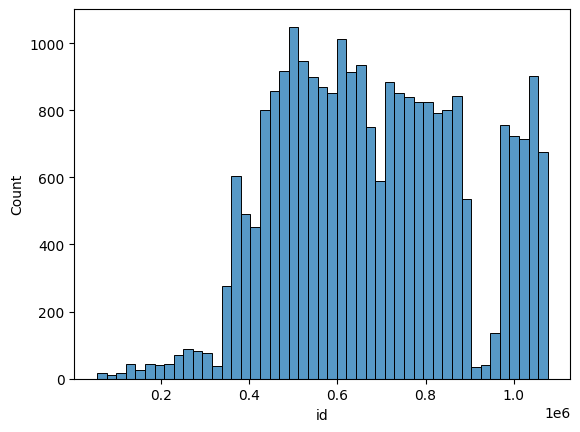

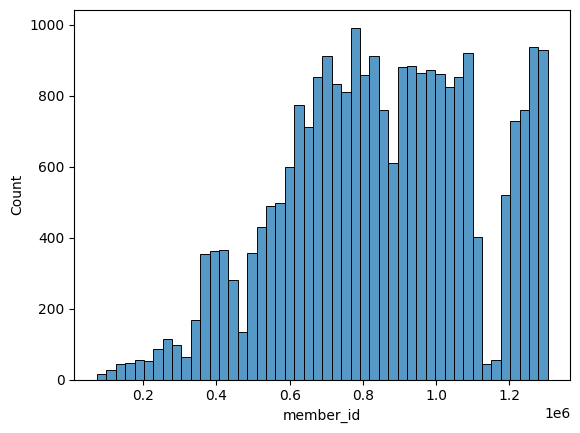

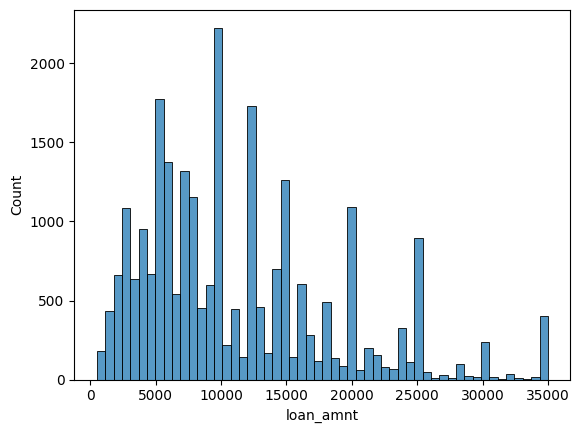

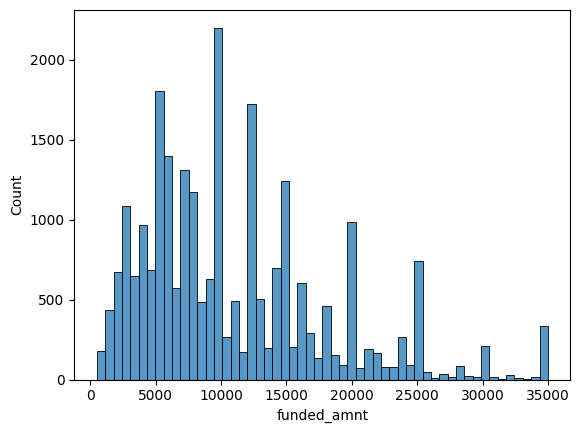

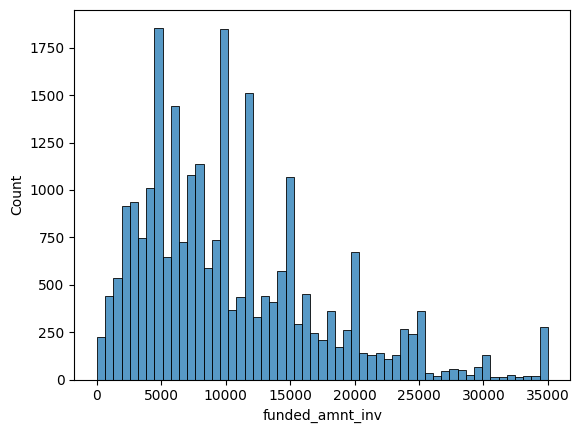

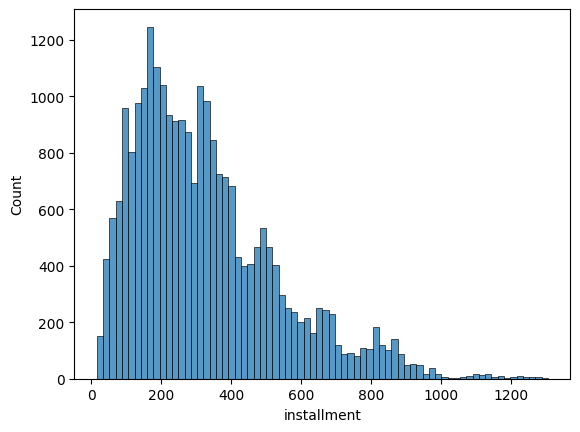

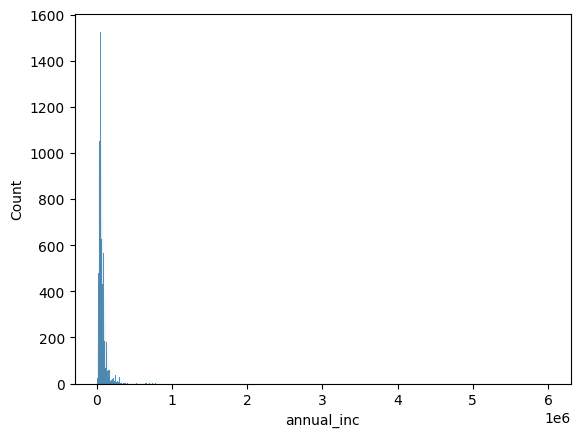

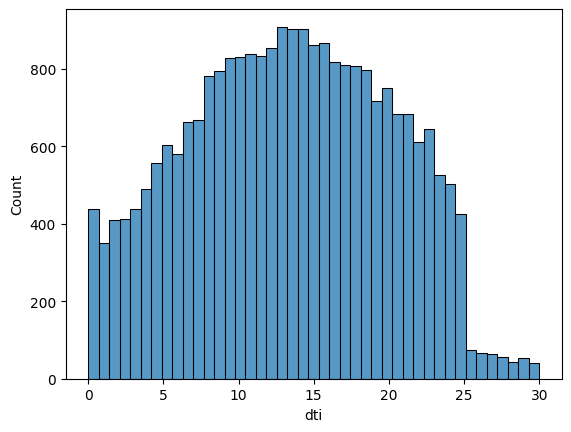

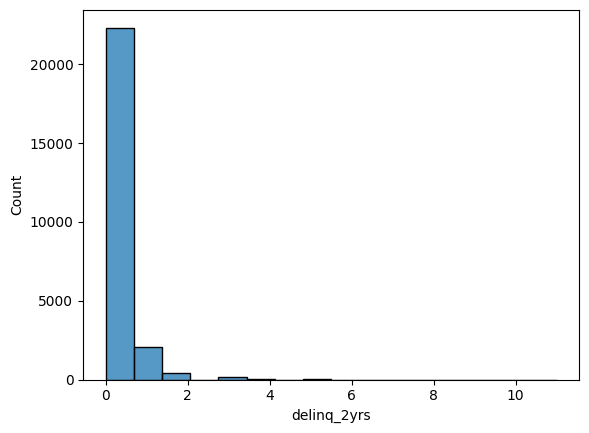

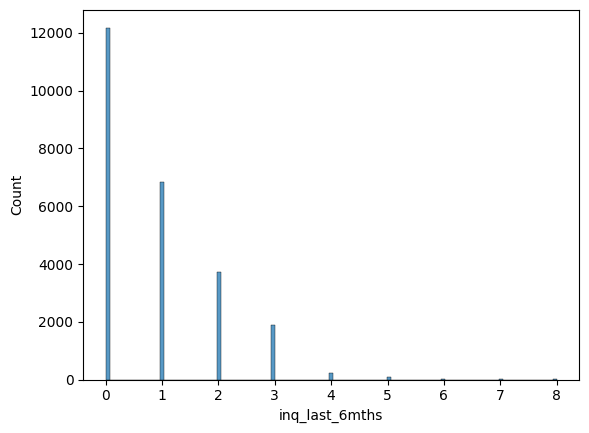

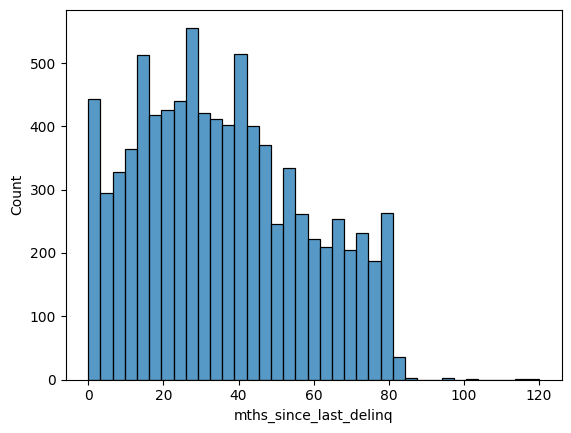

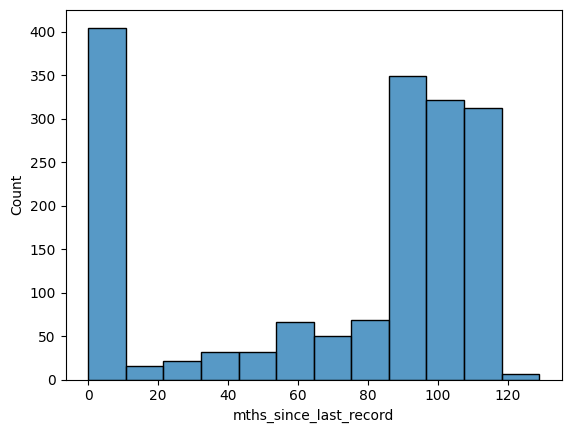

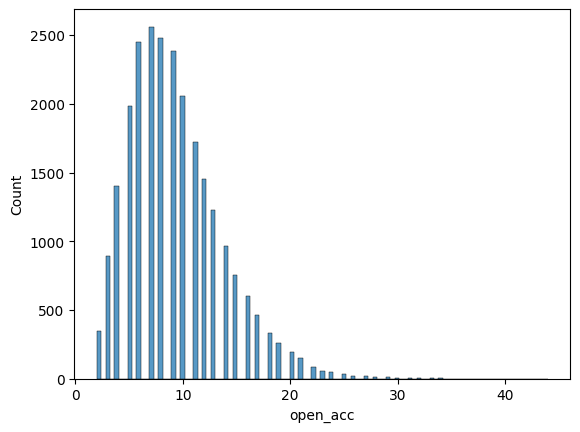

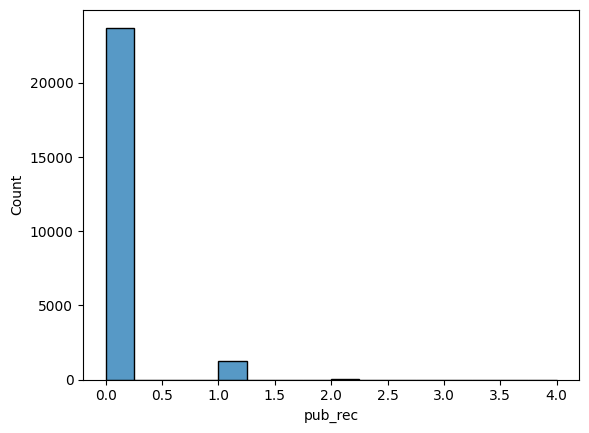

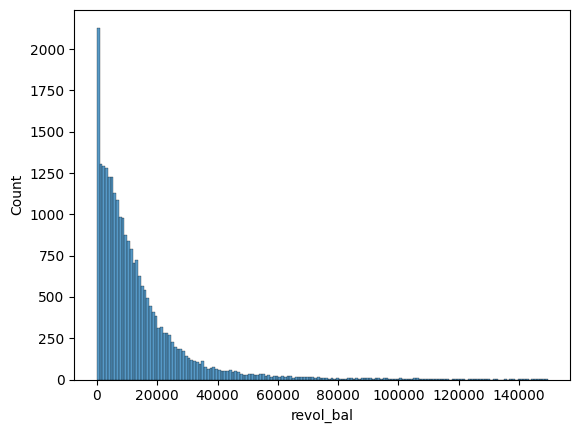

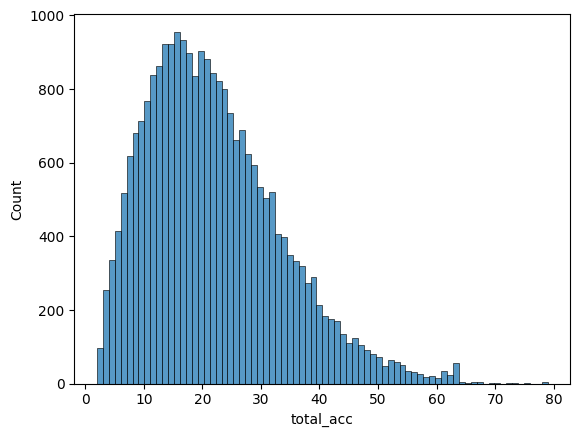

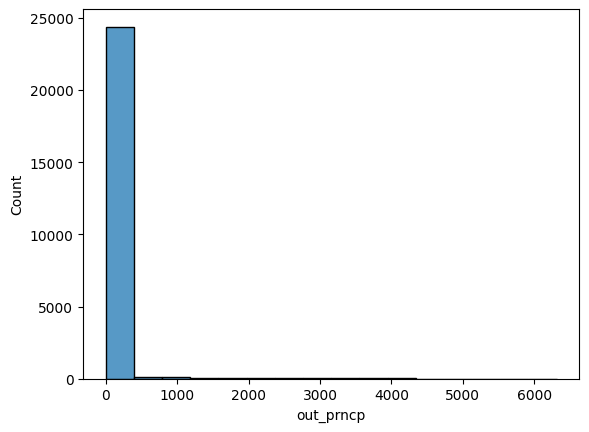

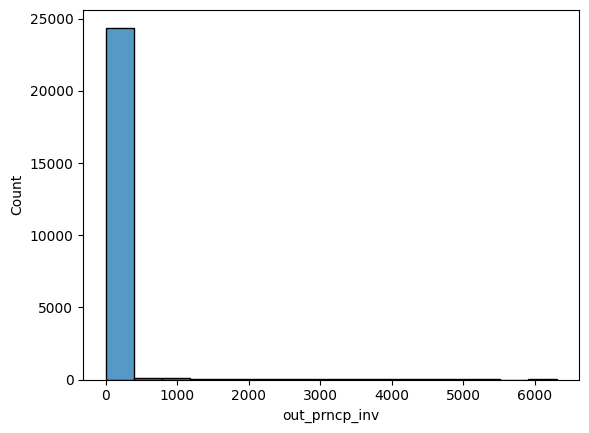

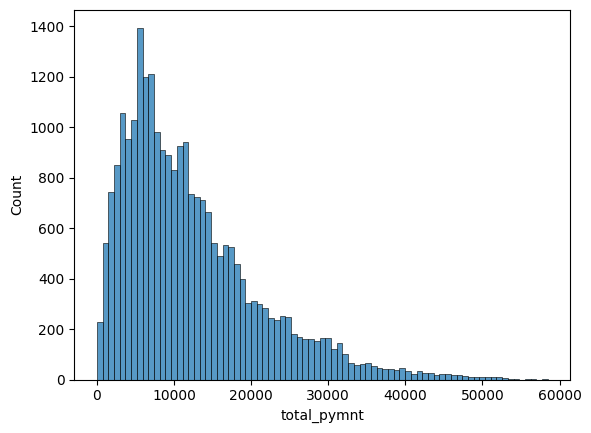

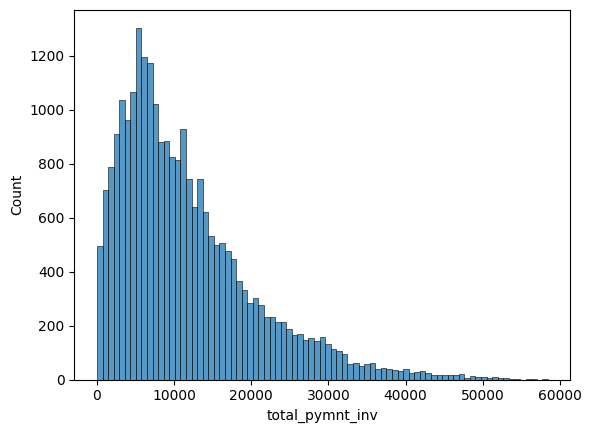

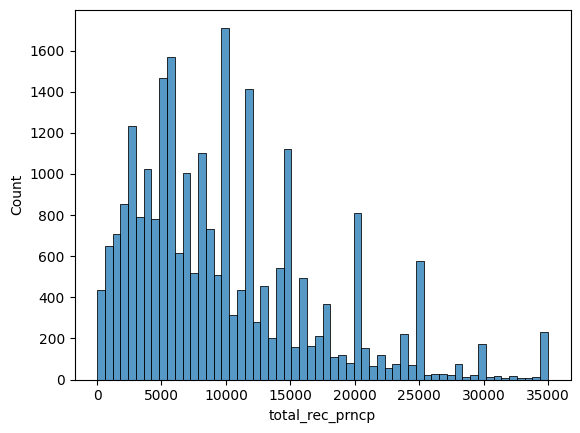

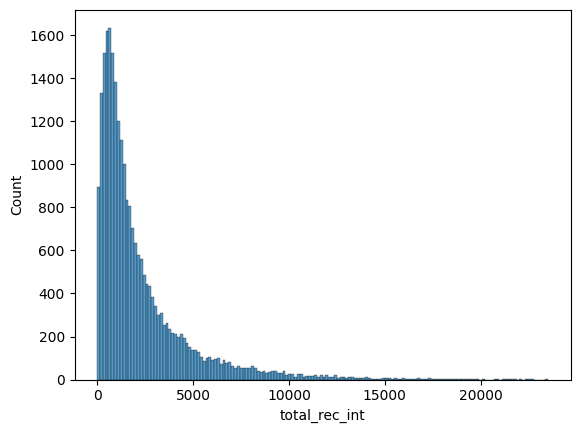

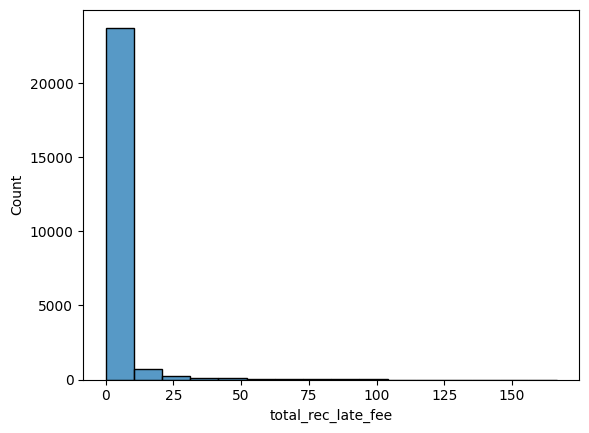

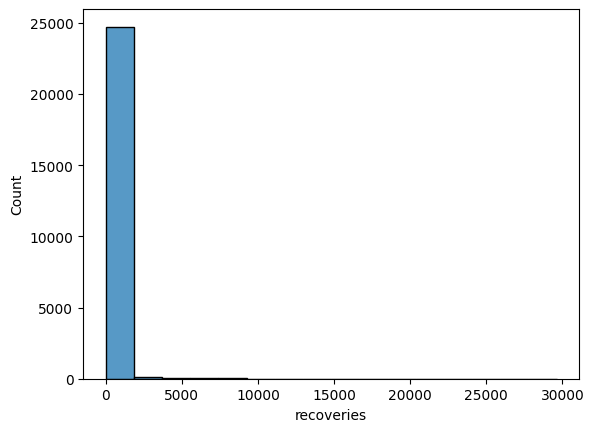

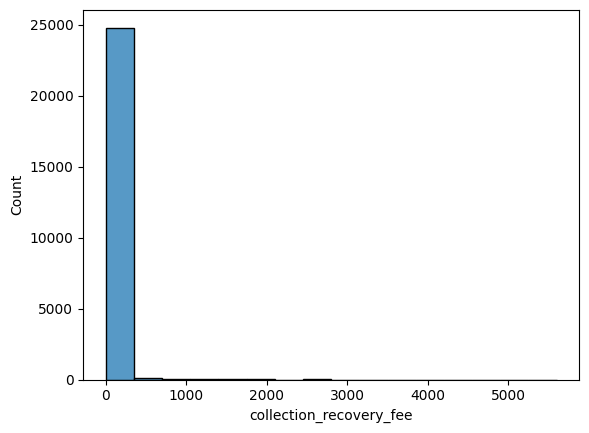

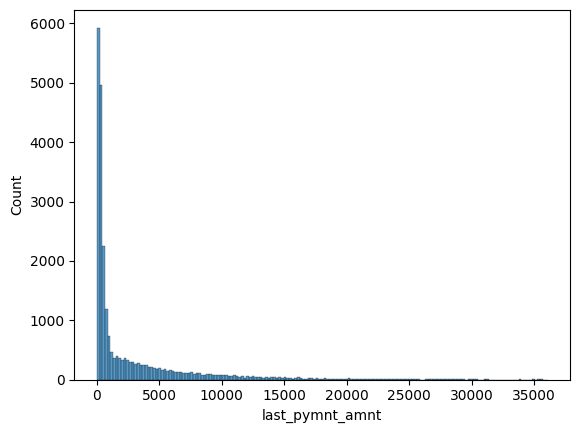

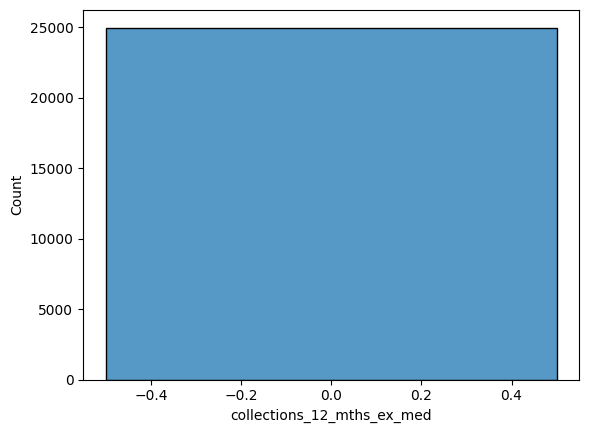

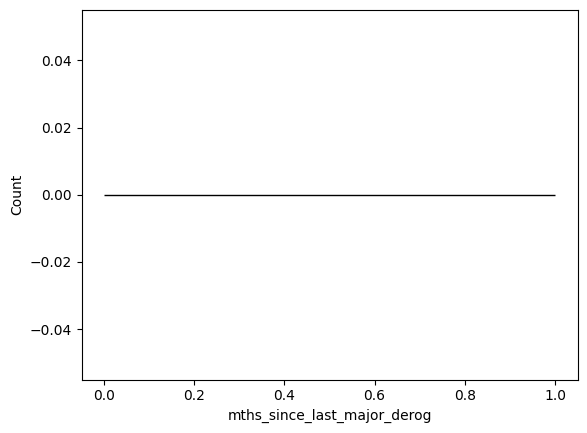

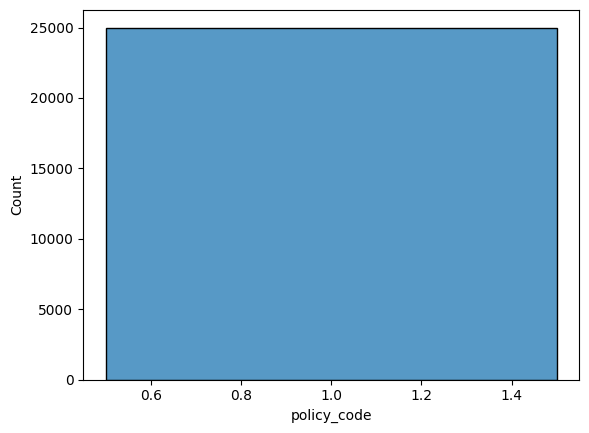

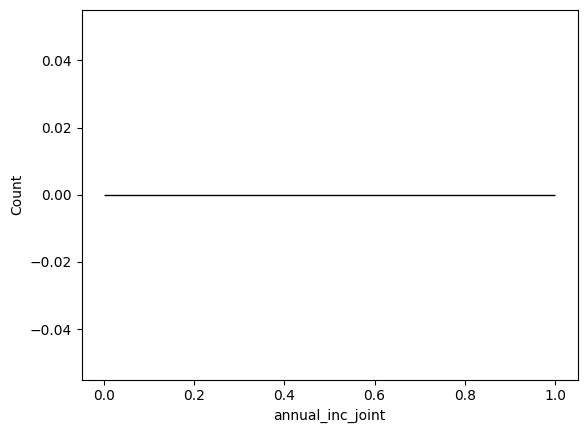

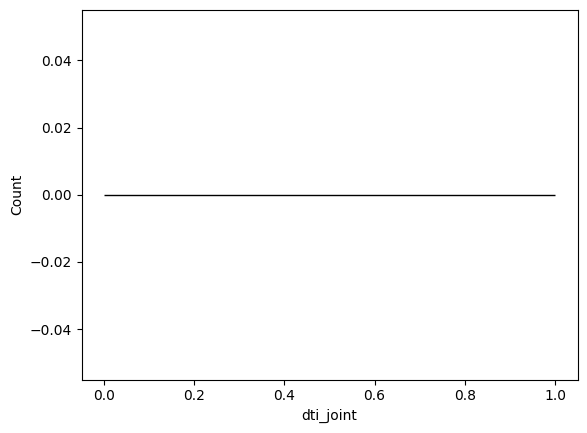

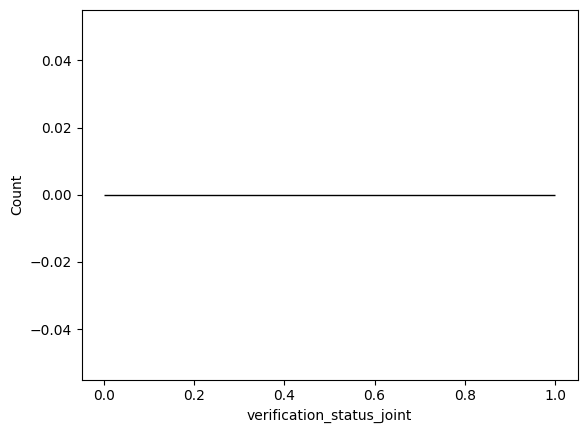

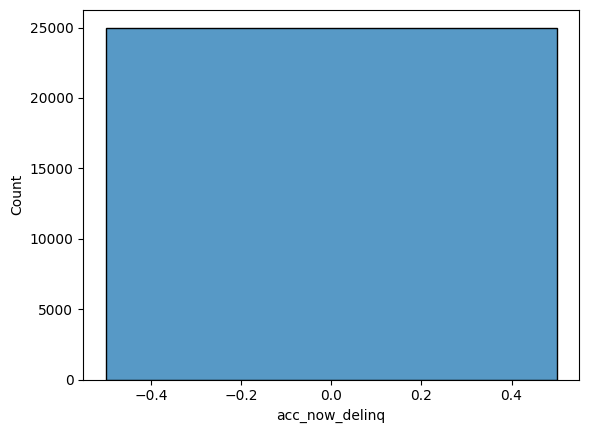

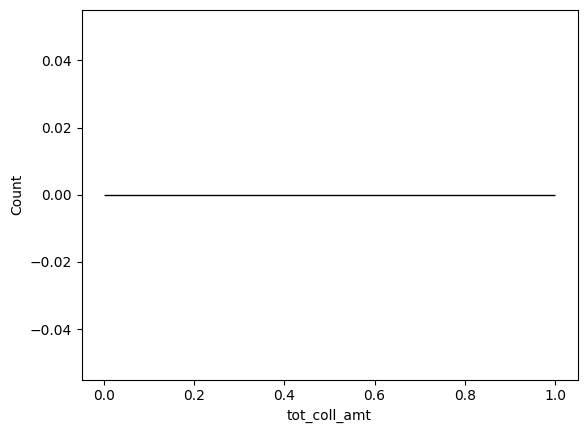

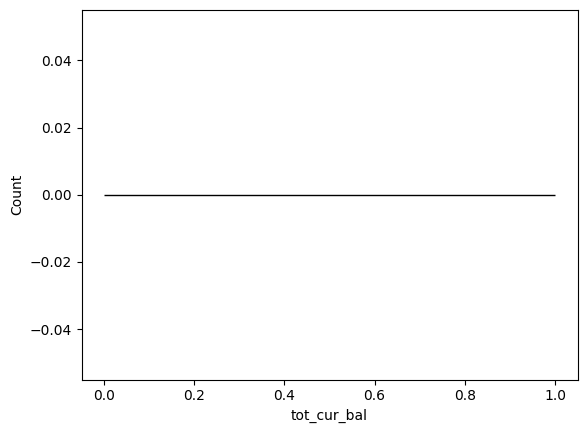

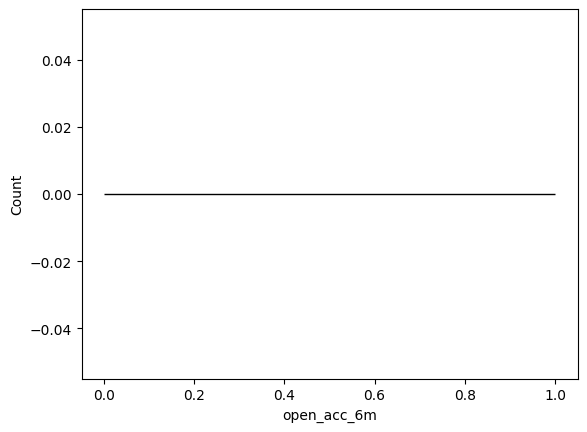

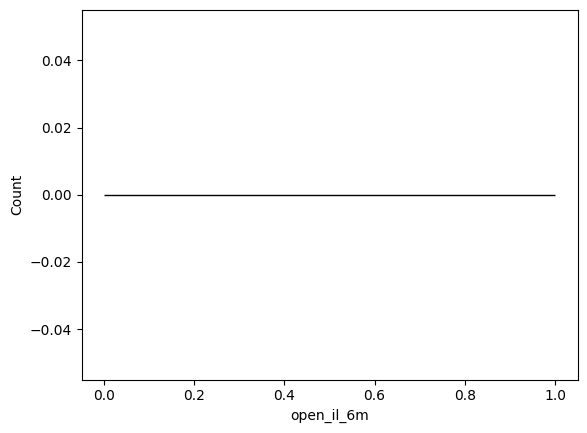

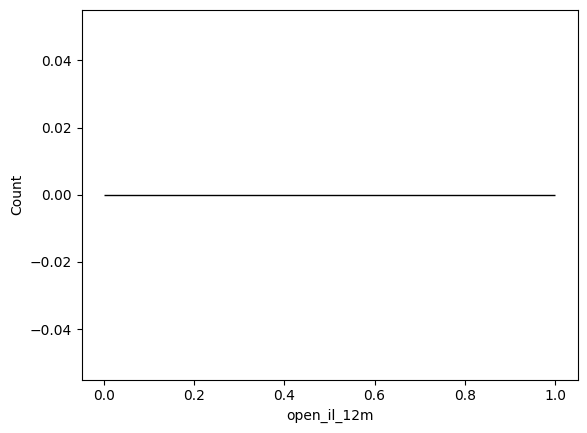

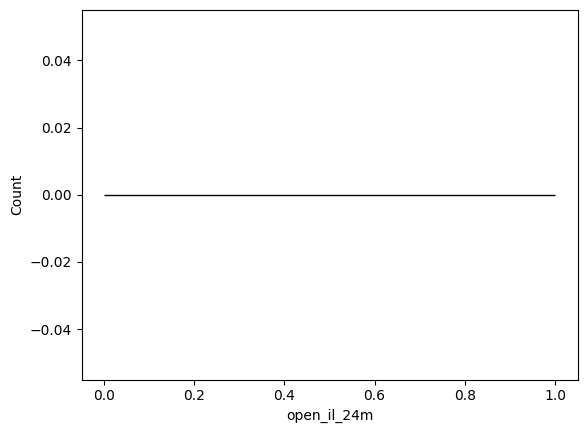

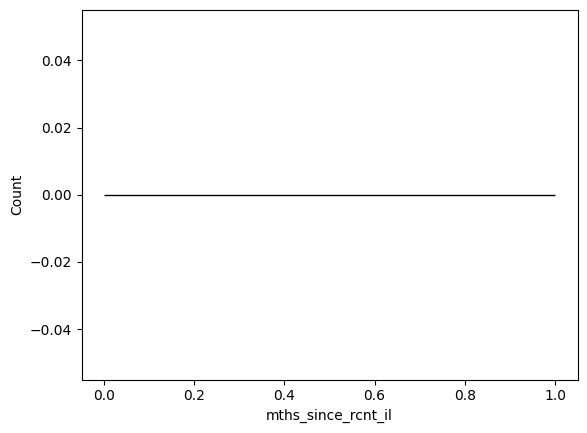

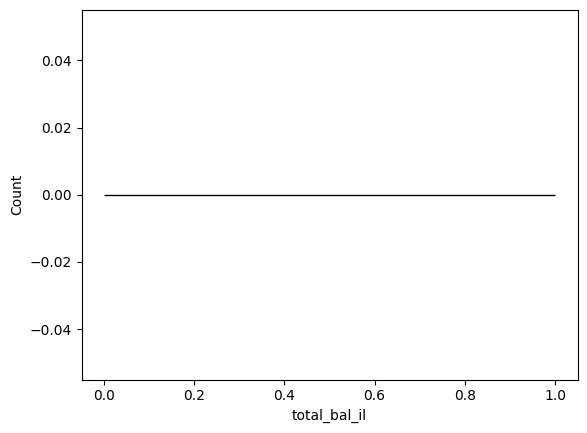

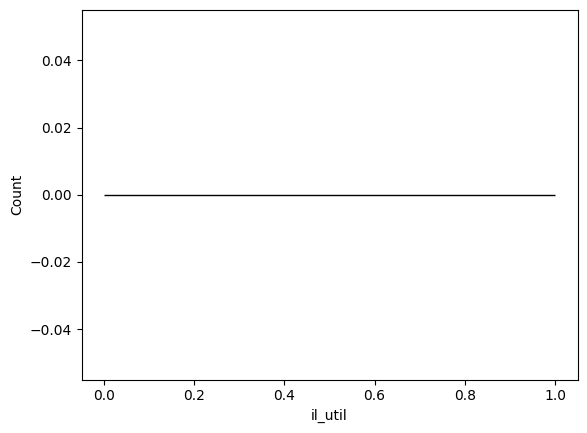

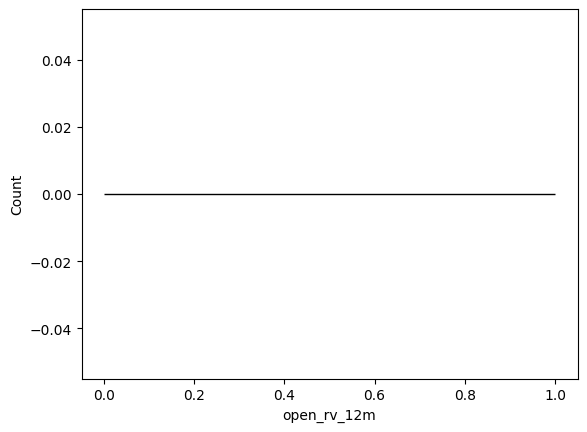

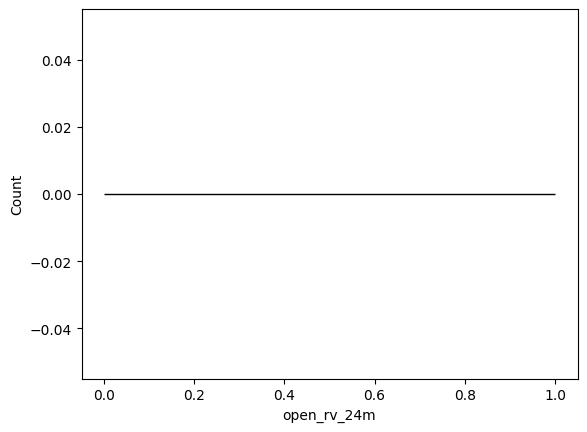

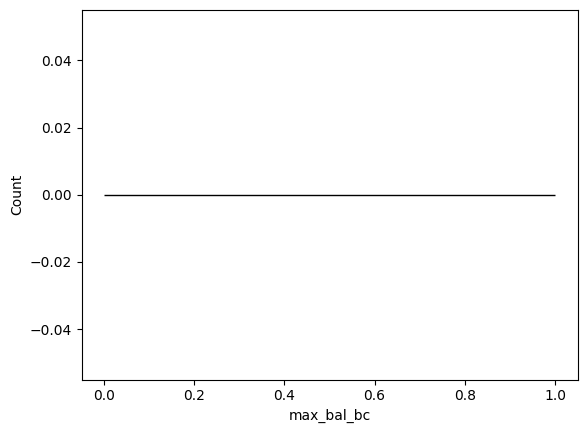

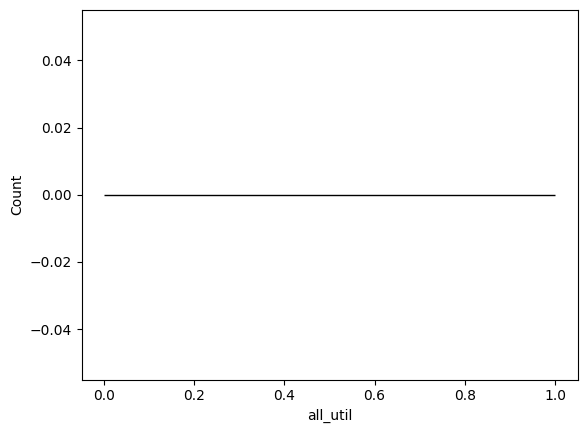

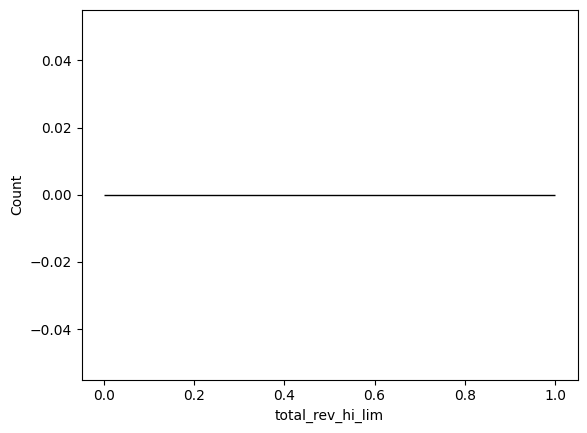

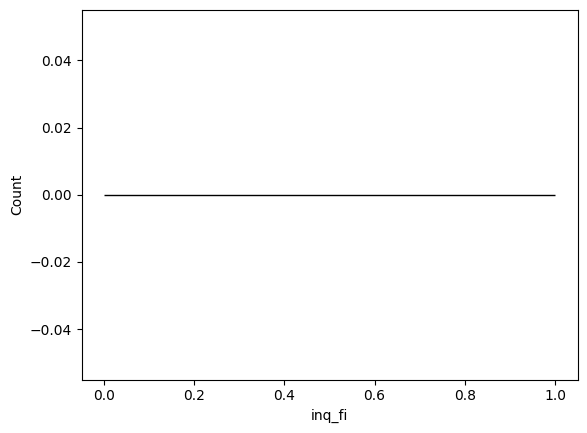

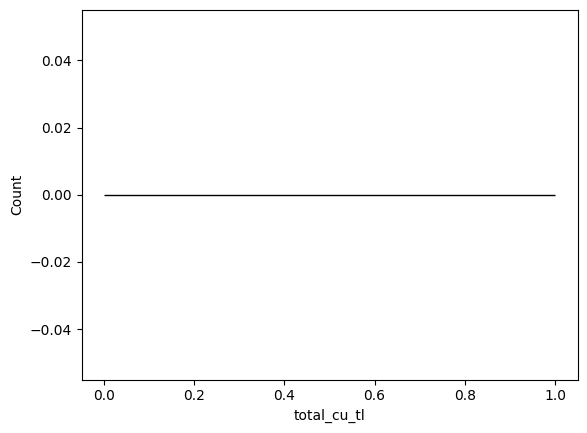

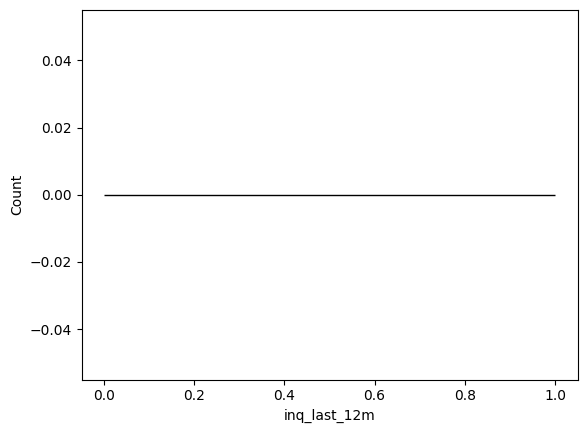

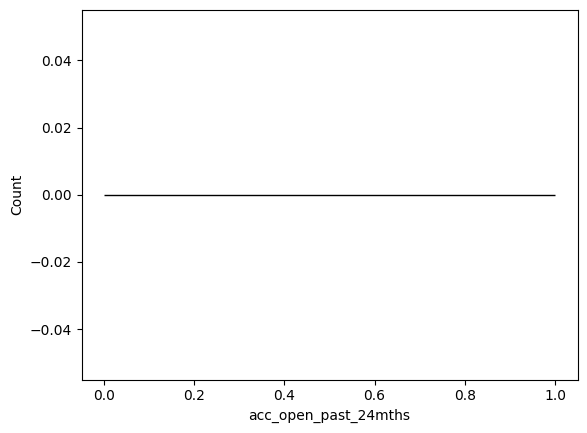

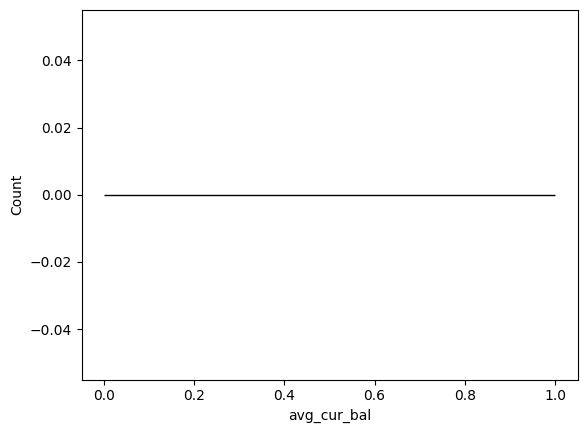

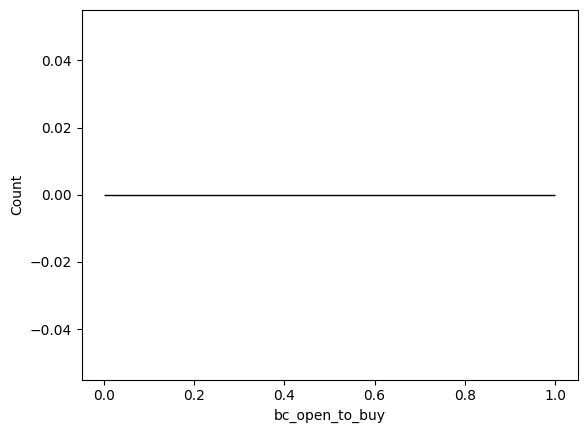

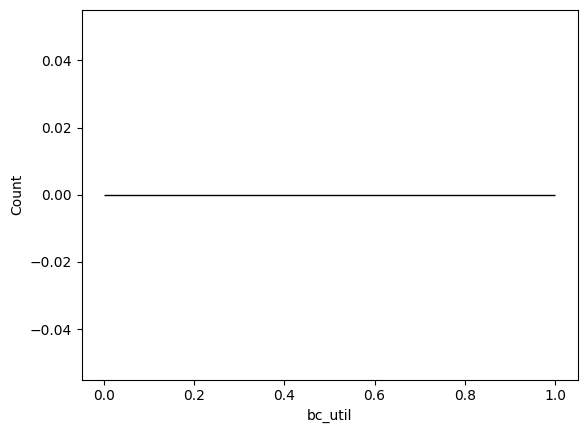

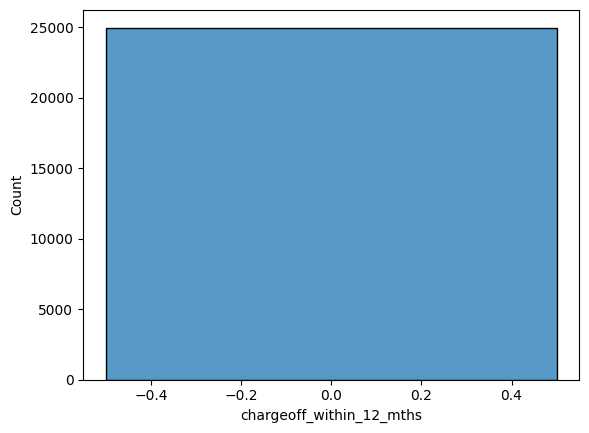

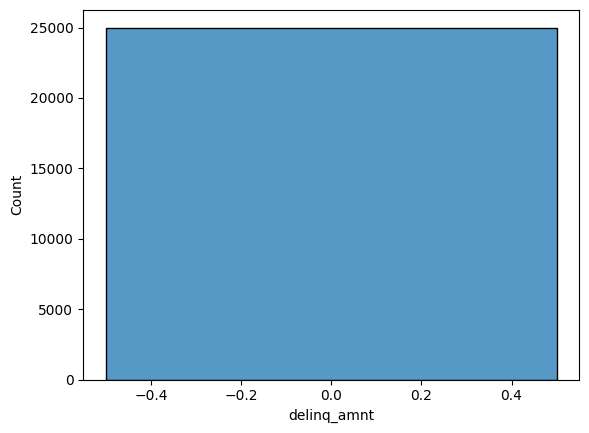

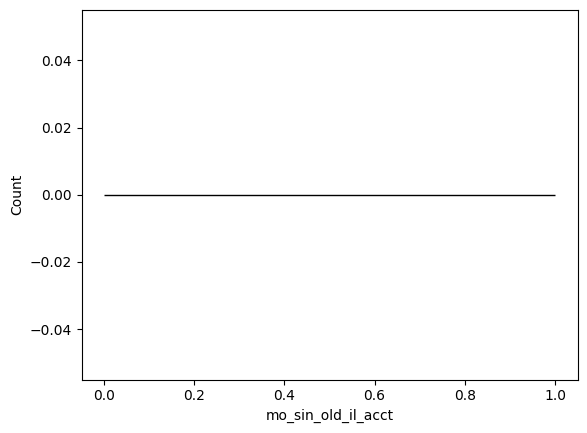

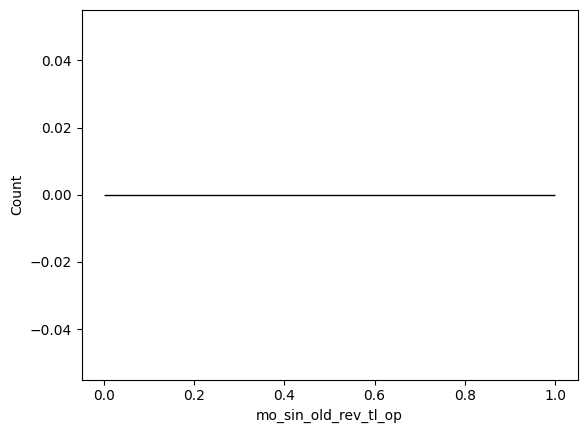

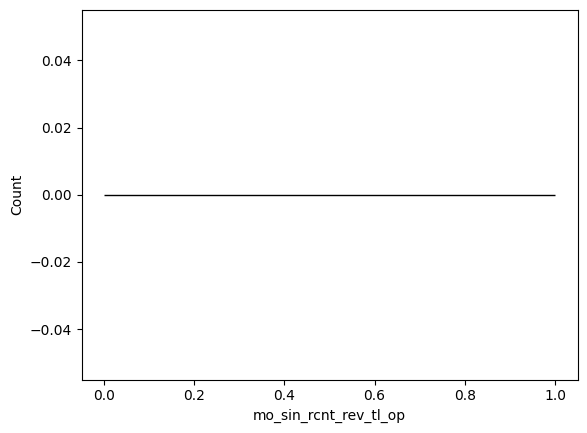

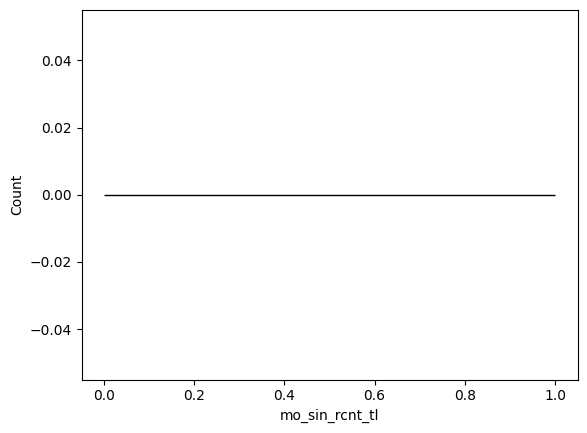

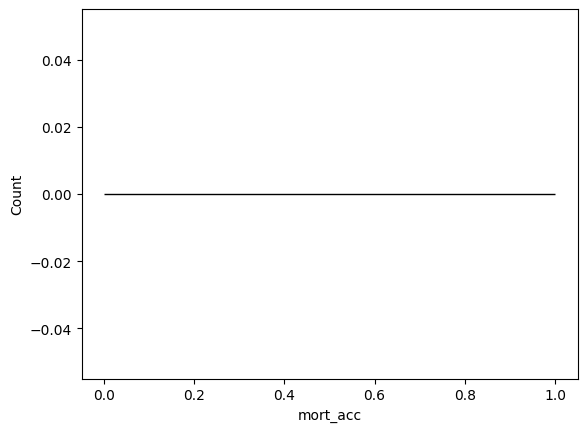

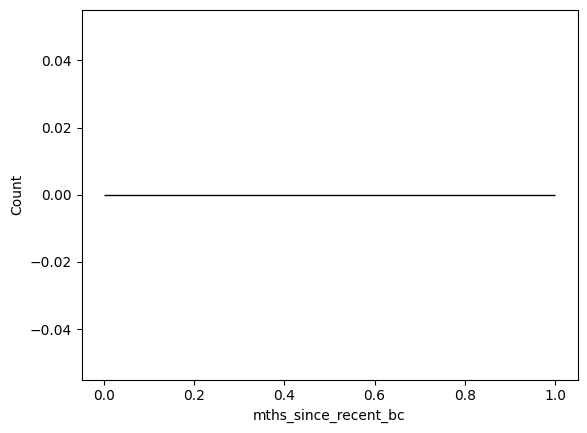

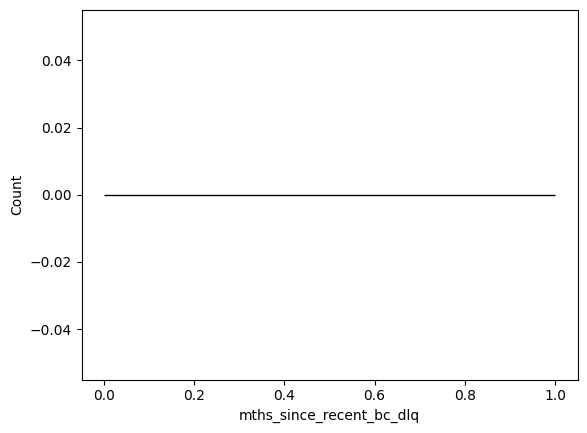

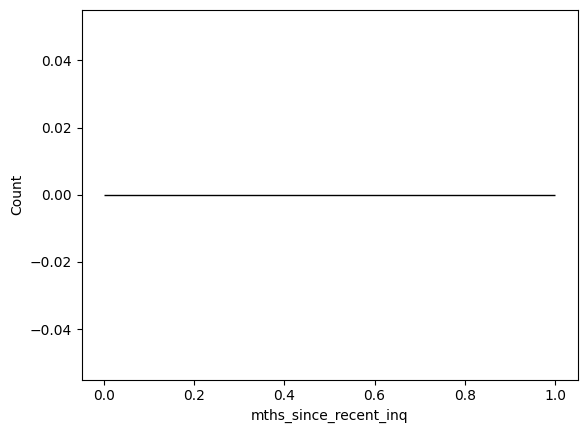

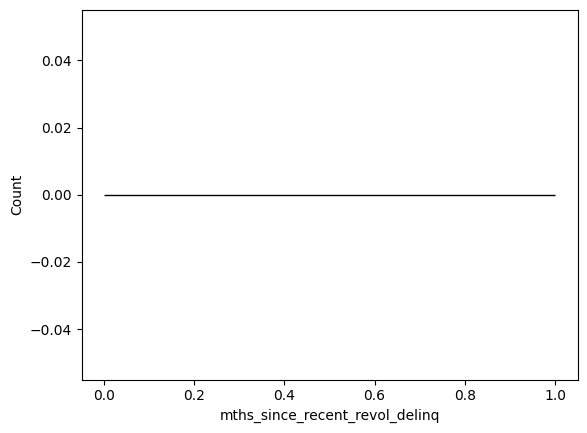

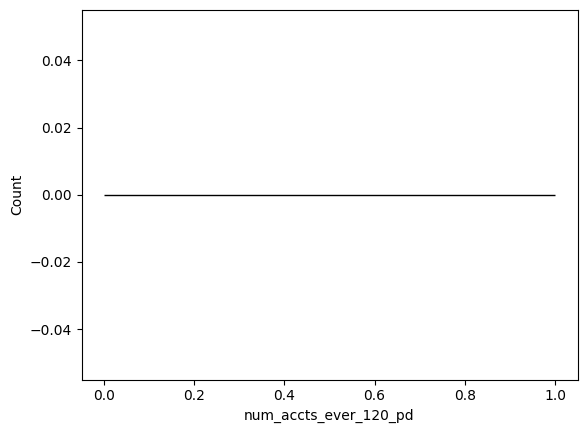

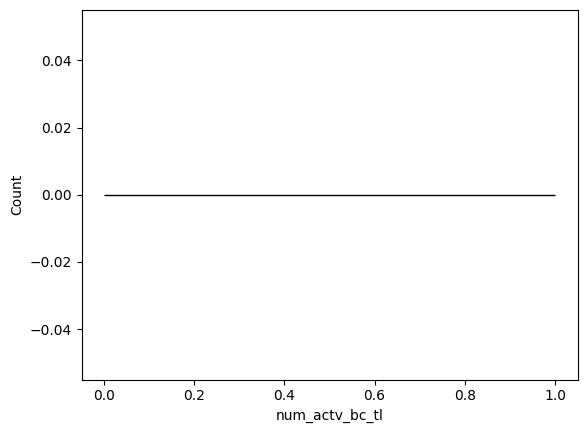

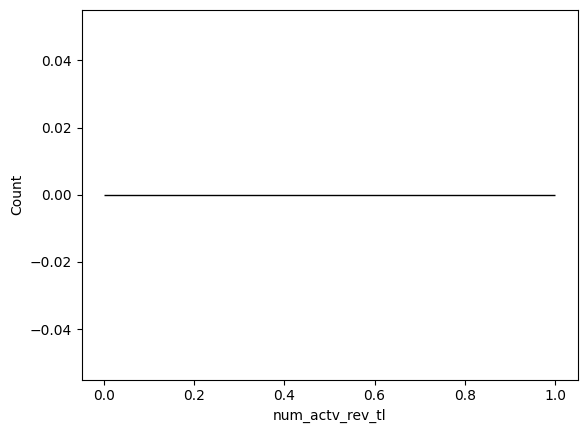

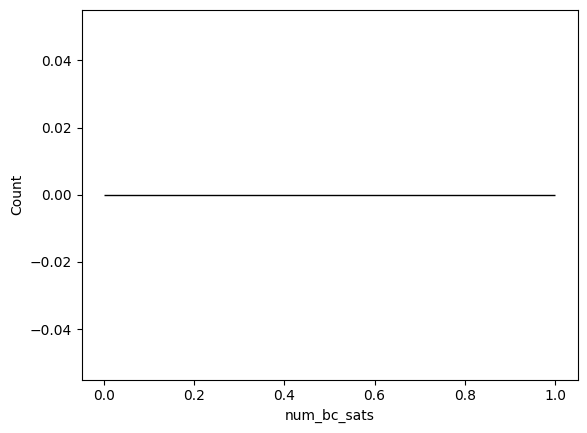

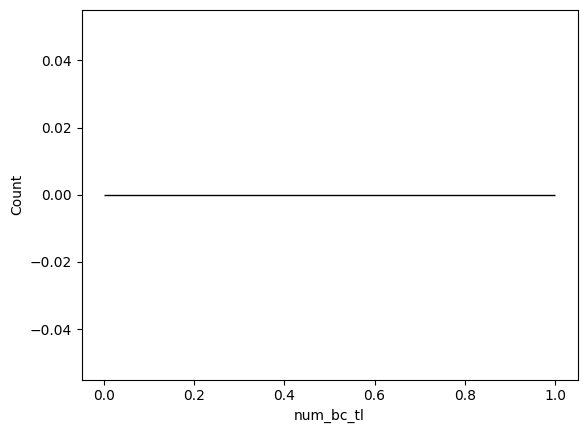

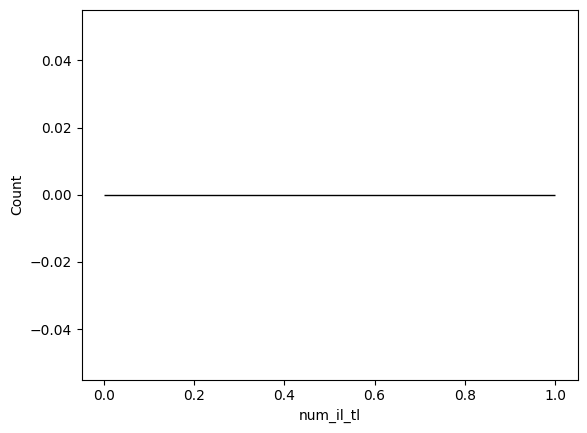

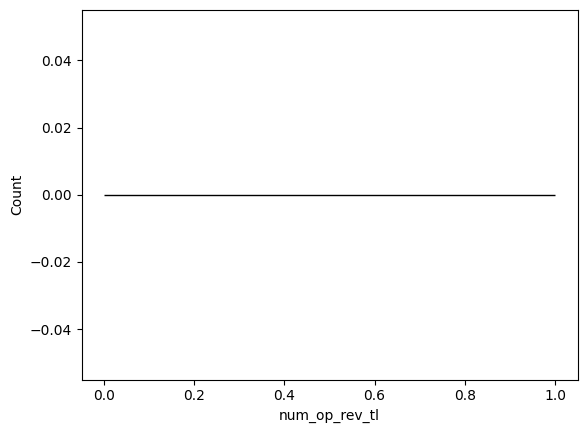

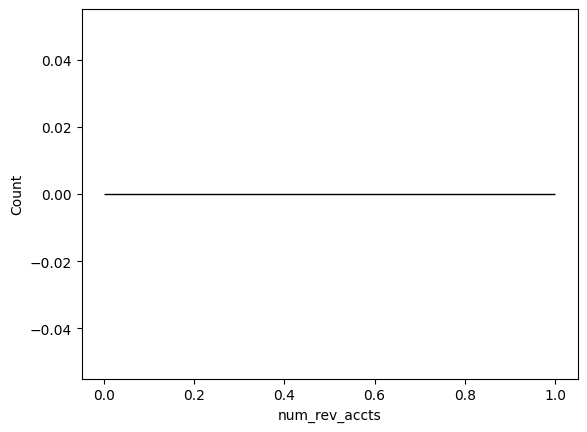

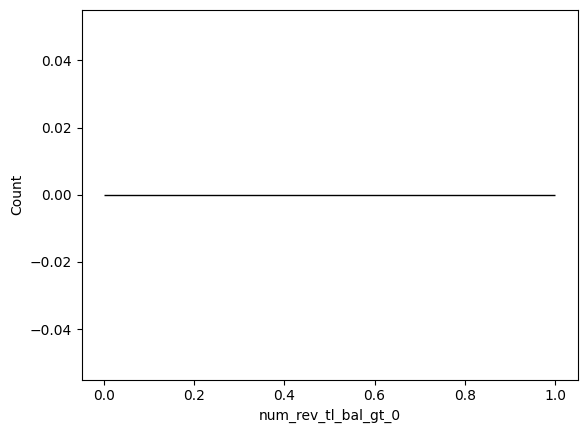

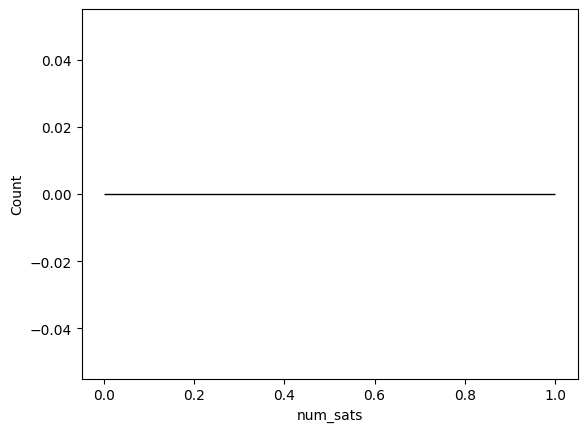

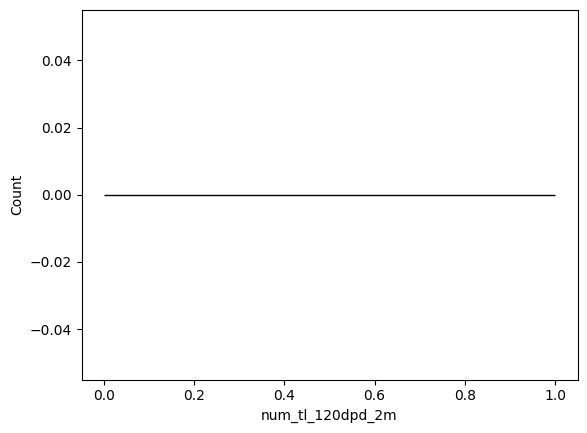

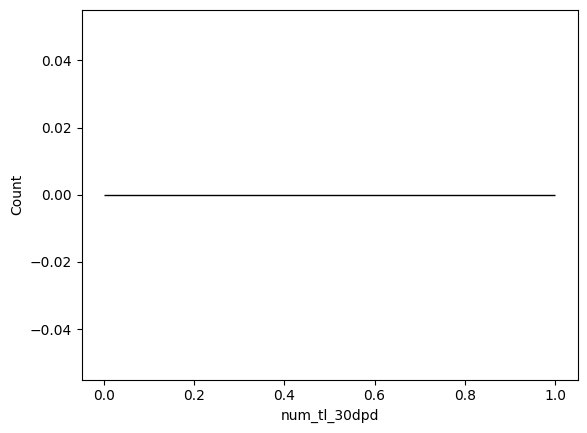

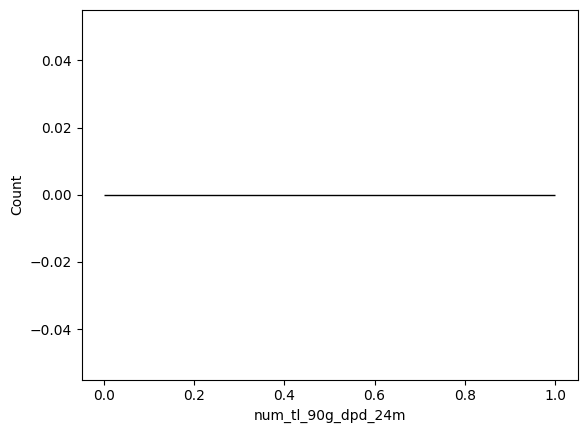

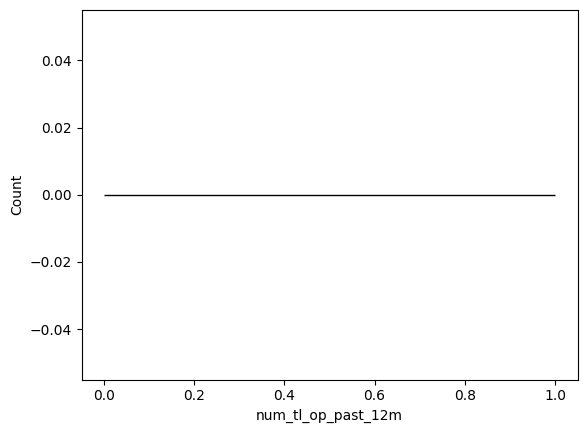

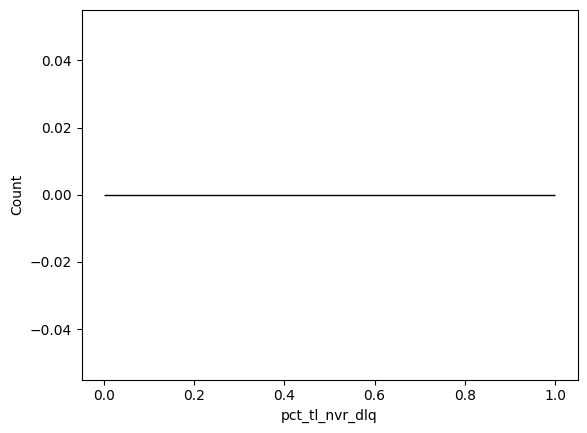

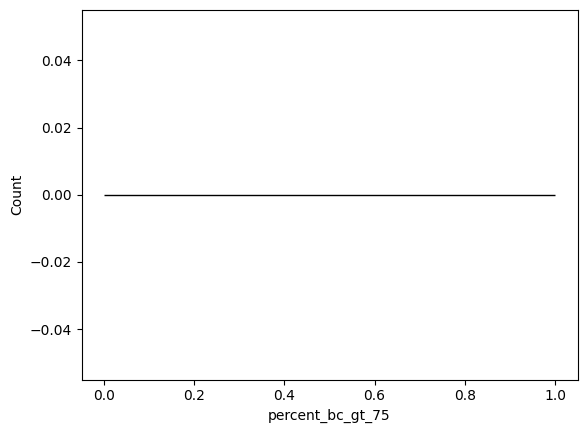

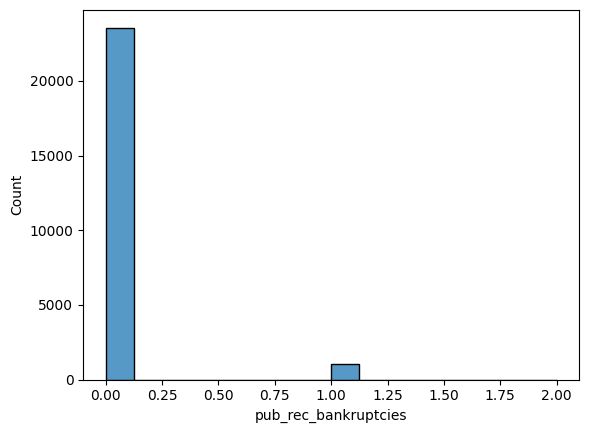

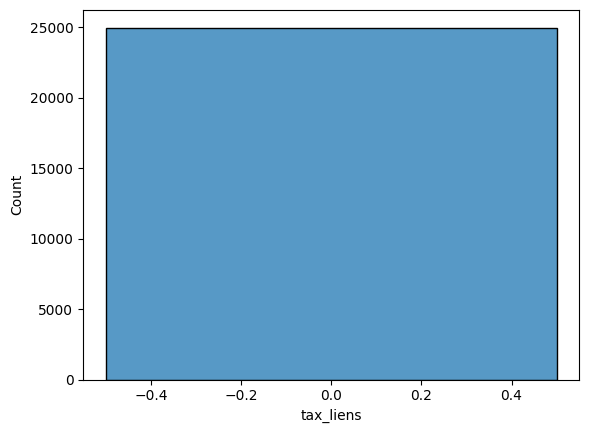

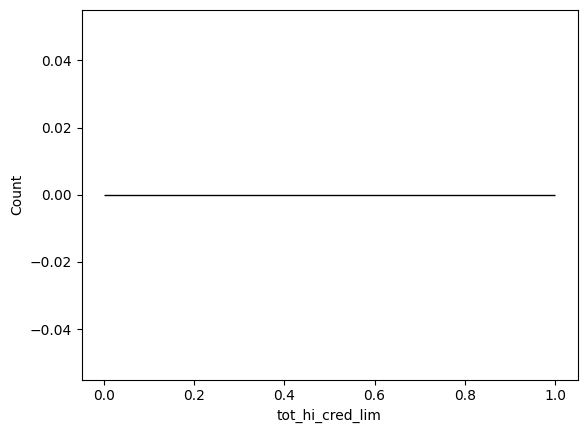

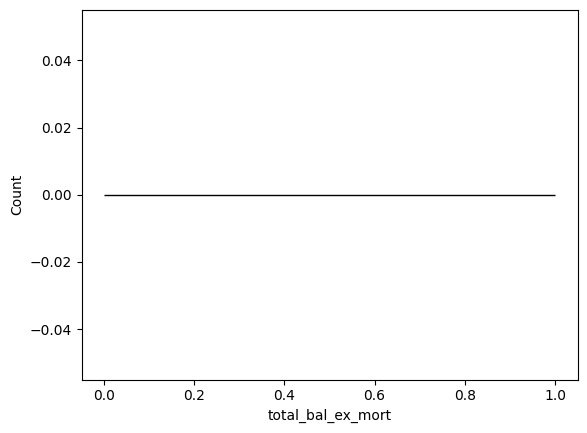

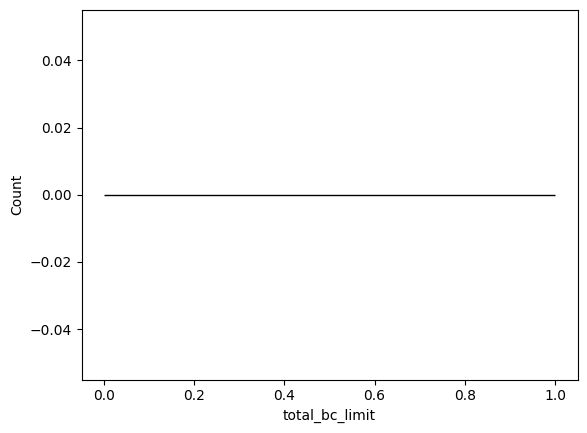

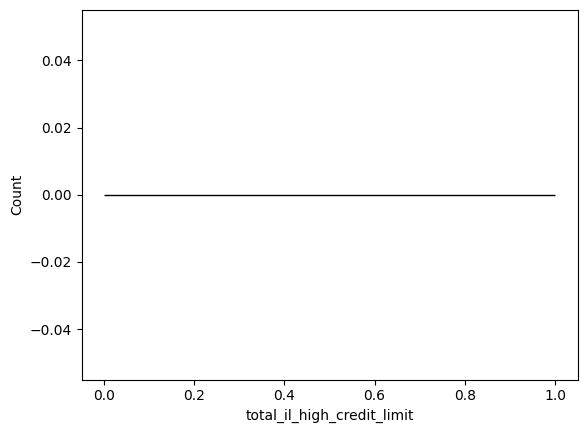

In [50]:
for i in data.select_dtypes(include="number").columns:
    sns.histplot(data=data, x=i)
    plt.show()

Remove unnecessary data

In [ ]:
# Any columns with >= 50% values as null are removed
columns_to_keep = data.columns[data.isnull().sum() / data.shape[0] <= 0.50]

data = data[columns_to_keep]
test_data = test_data[columns_to_keep]

In [52]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,573354,737474,10000,10000,9950.00000,36 months,7.51%,311.11,A,A4,...,311.11,11-Jul,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,476321,603324,15000,15000,14800.00000,36 months,8.94%,476.58,A,A5,...,15114.03,10-Feb,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,451484,556265,2000,2000,2000.00000,36 months,13.57%,67.94,C,C3,...,101.78,11-Dec,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1018129,1246557,35000,35000,33951.84413,60 months,20.89%,944.71,F,F1,...,944.71,16-May,0.0,1,INDIVIDUAL,0,0.0,0,2.0,0.0
4,800018,1005270,14000,14000,14000.00000,60 months,17.49%,351.64,D,D5,...,3943.27,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [53]:
data.shape

(24999, 54)

In [54]:
data.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                        6
emp_length                      41
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
desc                          8193
purpose                          0
title                            8
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc            

Missing Value treatment

In [55]:
columns_with_nulls = data.columns[data.isnull().any()]
for column in columns_with_nulls:
    print(column, data[column].dtype)

emp_title object
emp_length object
desc object
title object
revol_util object
last_pymnt_d object
collections_12_mths_ex_med float64
chargeoff_within_12_mths float64
pub_rec_bankruptcies float64
tax_liens float64


In [ ]:
# loan_status is the target, so ensure we dont treat it with missing value
# From above we can see that it is already does not have null values

# Any categorial variables that have null values are assigned the mode
for i in ["emp_title", "emp_length", "desc", "title", "revol_util", "last_pymnt_d"]:
    data[i] = data[i].fillna(data[i].mode()[0])

In [ ]:
# Any numerical variables that have null values are assigned the mean
for i in ["collections_12_mths_ex_med", "chargeoff_within_12_mths", "pub_rec_bankruptcies", "tax_liens"]:
    data[i] = data[i].fillna(data[i].mean())

In [ ]:
# Simillarly do the steps for the test data

columns_with_nulls = test_data.columns[test_data.isnull().any()]
for column in columns_with_nulls:
    print(column, test_data[column].dtype)

emp_title object
emp_length object
desc object
title object
revol_util object
last_pymnt_d object
last_credit_pull_d object
collections_12_mths_ex_med float64
chargeoff_within_12_mths float64
pub_rec_bankruptcies float64
tax_liens float64


In [59]:
# loan_status is the target, so ensure we dont treat it with missing value
# From above we can see that it is already does not have null values

for i in ["emp_title", "emp_length", "desc", "title", "revol_util", "last_pymnt_d", "last_credit_pull_d"]:
    test_data[i] = test_data[i].fillna(test_data[i].mode()[0])

In [60]:
for i in ["collections_12_mths_ex_med", "chargeoff_within_12_mths", "pub_rec_bankruptcies", "tax_liens"]:
    test_data[i] = test_data[i].fillna(test_data[i].mean())

In [61]:
data.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
desc                          0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

In [62]:
test_data.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
desc                          0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

Duplicates and Garbadge values

In [63]:
# We have already checked that we dont have any duplicates and garbadge values, so no need to treat them

Encoding of cateogorical data

In [ ]:
data = pd.get_dummies(data=data, columns=["term", "grade", "home_ownership", "verification_status", "pymnt_plan", "initial_list_status", "application_type", "sub_grade", "purpose"], drop_first=True)
test_data = pd.get_dummies(data=test_data, columns=["term", "grade", "home_ownership", "verification_status", "pymnt_plan", "initial_list_status", "application_type", "sub_grade", "purpose"], drop_first=True)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd

# Assuming your data is in a DataFrame called `df`
# Map the values as specified and ignore "Current"
data['loan_status'] = data['loan_status'].map({
    'Fully Paid': 1,
    'Charged Off': -1
})

test_data['loan_status'] = test_data['loan_status'].map({
    'Fully Paid': 1,
    'Charged Off': -1
})

# Filter out rows where 'loan_status' is NaN (i.e., those originally labeled "Current")
data = data.dropna(subset=['loan_status'])
test_data = test_data.dropna(subset=['loan_status'])

In [66]:
import pandas as pd

# Assuming your data is in a DataFrame called `df`
data = data.drop(['id', 'member_id', 'emp_title', 'emp_length', 'issue_d', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis=1)
test_data = test_data.drop(['id', 'member_id', 'emp_title', 'emp_length', 'issue_d', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis=1)

In [67]:
data['int_rate'] = data['int_rate'].str.rstrip('%').astype('float') / 100
data['revol_util'] = data['revol_util'].str.rstrip('%').astype('float') / 100

test_data['int_rate'] = test_data['int_rate'].str.rstrip('%').astype('float') / 100
test_data['revol_util'] = test_data['revol_util'].str.rstrip('%').astype('float') / 100

In [68]:
# Separate features and target
X_train = data.drop(columns=['loan_status'])
y_train = data['loan_status']

# Separate features and target
X_test = test_data.drop(columns=['loan_status'])
y_test = test_data['loan_status']

In [69]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000,10000,9950.0,0.0751,311.11,30000.0,5.00,0,3,19,...,True,False,False,False,False,False,False,False,False,False
1,15000,15000,14800.0,0.0894,476.58,147000.0,3.47,0,0,6,...,False,False,False,False,False,True,False,False,False,False
2,2000,2000,2000.0,0.1357,67.94,36000.0,7.83,0,0,8,...,False,False,True,False,False,False,False,False,False,False
4,14000,14000,14000.0,0.1749,351.64,50000.0,21.24,1,1,9,...,False,False,False,False,False,False,False,False,False,False
5,12000,12000,11900.0,0.0894,381.26,294000.0,0.50,0,0,11,...,False,False,False,False,False,True,False,False,False,False


In [70]:
y_train.head()

0   -1.0
1    1.0
2    1.0
4    1.0
5    1.0
Name: loan_status, dtype: float64

In [71]:
X_train.shape

(24301, 90)

In [72]:
X_test.shape

(14276, 91)

In [73]:
X_test = X_test[X_train.columns]

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
from sklearn.model_selection import cross_val_score

best_depth = 0
best_accuracy = 0

# Looking at the effect of depth on decision tree
for depth in range(1, 21):
    tree_model = tree.DecisionTreeClassifier(max_depth=depth, random_state=42, criterion='entropy')
    
    cv_scores = cross_val_score(tree_model, X_train, y_train, cv=10, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    
    print(f"Depth: {depth}, Cross-Validation Accuracy: {mean_accuracy}")
    
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_depth = depth

print(f"Best Depth from Cross-Validation: {best_depth}, Best Cross-Validation Accuracy: {best_accuracy}")

test_model = tree.DecisionTreeClassifier(max_depth=best_depth, random_state=42, criterion='entropy')
test_model.fit(X_train, y_train)

y_pred = test_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred) 
test_recall = recall_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

Depth: 1, Cross-Validation Accuracy: 0.9650220319501365
Depth: 2, Cross-Validation Accuracy: 0.9650220319501365
Depth: 3, Cross-Validation Accuracy: 0.9846920351495516
Depth: 4, Cross-Validation Accuracy: 0.9865437685045528
Depth: 5, Cross-Validation Accuracy: 0.9916463275286805
Depth: 6, Cross-Validation Accuracy: 0.9949795931495279
Depth: 7, Cross-Validation Accuracy: 0.9963375501283999
Depth: 8, Cross-Validation Accuracy: 0.9970782739410191
Depth: 9, Cross-Validation Accuracy: 0.9969136648875212
Depth: 10, Cross-Validation Accuracy: 0.9965432945171507
Depth: 11, Cross-Validation Accuracy: 0.9968725295522681
Depth: 12, Cross-Validation Accuracy: 0.9968725295522681
Depth: 13, Cross-Validation Accuracy: 0.9967079204987701
Depth: 14, Cross-Validation Accuracy: 0.9967490727621447
Depth: 15, Cross-Validation Accuracy: 0.9967079204987701
Depth: 16, Cross-Validation Accuracy: 0.9967079204987701
Depth: 17, Cross-Validation Accuracy: 0.9967079204987701
Depth: 18, Cross-Validation Accuracy: 0.

In [ ]:
clf = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

In [76]:
# Lets understand the affect of learning rate on the accuracy:

accuracies = []
recall = []
precision = []

for learning_rate in [0.001, 0.01, 0.1, 1]:
    this_clf = GradientBoostingClassifier(learning_rate=learning_rate, random_state=42).fit(X_train, y_train)
    y_pred = this_clf.predict(X_test)
    this_score = accuracy_score(y_test, y_pred)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    accuracies.append(accuracy_score)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    print(f"Learning Rate: {learning_rate}, Accuracy: {this_score}, Precision: {this_precision}, Recall: {this_recall}")

Learning Rate: 0.001, Accuracy: 0.8491874474642757, Precision: 0.8491874474642757, Recall: 1.0
Learning Rate: 0.01, Accuracy: 0.97219108994116, Precision: 0.9682907348242812, Recall: 1.0
Learning Rate: 0.1, Accuracy: 0.9947464275707482, Precision: 0.9939324368645458, Recall: 0.9999175121669553
Learning Rate: 1, Accuracy: 0.9937657607172877, Precision: 0.996042868920033, Recall: 0.9966179988451703


In [ ]:
# Lets understand the affect of learning rate on the accuracy:

best_accuracy = 0
best_learning_rate = 0

accuracies = []
recall = []
precision = []

for learning_rate in [i for i in range (1, 10, 1)]:
    this_clf = GradientBoostingClassifier(learning_rate=learning_rate/10, random_state=42).fit(X_train, y_train)
    y_pred = this_clf.predict(X_test)
    this_score = accuracy_score(y_test, y_pred)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    accuracies.append(accuracy_score)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    if this_score > best_accuracy:
        best_accuracy = this_score
        best_learning_rate = learning_rate

    print(f"Learning Rate: {learning_rate/10}, Accuracy: {this_score}, Precision: {this_precision}, Recall: {this_recall}")

print(f"Best Learning Rate: {best_learning_rate/10}, best accuracy: {best_accuracy}")


Learning Rate: 1, Accuracy: 0.9947464275707482, Precision: 0.9939324368645458, Recall: 0.9999175121669553
Learning Rate: 2, Accuracy: 0.9958671896889885, Precision: 0.9957264957264957, Recall: 0.9994225851686876
Learning Rate: 3, Accuracy: 0.9961473802185487, Precision: 0.9958908612754767, Recall: 0.9995875608347768
Learning Rate: 4, Accuracy: 0.9965676660128888, Precision: 0.99654548445468, Recall: 0.9994225851686876
Learning Rate: 5, Accuracy: 0.9966377136452788, Precision: 0.9965457685664939, Recall: 0.9995050730017322
Learning Rate: 6, Accuracy: 0.9958671896889885, Precision: 0.9964609053497943, Recall: 0.998680194671286
Learning Rate: 7, Accuracy: 0.9950266181003082, Precision: 0.995722277064824, Recall: 0.9984327311721521
Learning Rate: 8, Accuracy: 0.9947464275707482, Precision: 0.9958024691358025, Recall: 0.998020292006929
Learning Rate: 9, Accuracy: 0.9949565704679182, Precision: 0.9962935507783544, Recall: 0.9977728285077951
Best Learning Rate: 0.5, best accuracy: 0.996637713

In [85]:
# Lets understand the affect of Max depth on the accuracy:

accuracies = []
recall = []
precision = []

best_accuracy = 0
best_max_depth = 0

for max_depth in [j for j in range(1, 20, 1)]:
    this_clf = GradientBoostingClassifier(max_depth=max_depth, random_state=42).fit(X_train, y_train)
    y_pred = this_clf.predict(X_test)
    this_score = accuracy_score(y_test, y_pred)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    accuracies.append(accuracy_score)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    if this_score > best_accuracy:
        best_accuracy = this_score
        best_max_depth = max_depth


    print(f"Max Depth: {max_depth}, Accuracy: {this_score}, Precision: {this_precision}, Recall: {this_recall}")


print(f"Best Max Depth: {best_max_depth}, Accuracy: {best_accuracy}")

Max Depth: 1, Accuracy: 0.9770944242084617, Precision: 0.9742682534577034, Recall: 0.9994225851686876
Max Depth: 2, Accuracy: 0.9927150462314374, Precision: 0.9914942340721354, Recall: 1.0
Max Depth: 3, Accuracy: 0.9947464275707482, Precision: 0.9939324368645458, Recall: 0.9999175121669553
Max Depth: 4, Accuracy: 0.9959372373213785, Precision: 0.9953198127925117, Recall: 0.9999175121669553
Max Depth: 5, Accuracy: 0.9964976183804988, Precision: 0.9958925490840385, Recall: 1.0
Max Depth: 6, Accuracy: 0.997198094704399, Precision: 0.9968747429887326, Recall: 0.9998350243339107
Max Depth: 7, Accuracy: 0.9978985710282993, Precision: 0.997531473710195, Recall: 1.0
Max Depth: 8, Accuracy: 0.9976183804987392, Precision: 0.9972850678733032, Recall: 0.9999175121669553
Max Depth: 9, Accuracy: 0.9972681423367891, Precision: 0.9967932905772077, Recall: 1.0
Max Depth: 10, Accuracy: 0.9972681423367891, Precision: 0.9967932905772077, Recall: 1.0
Max Depth: 11, Accuracy: 0.9970579994396189, Precision: 

In [ ]:
# Lets understand the affect of n_estimators on the accuracy:

accuracies = []
recall = []
precision = []

best_accuracy = 0
best_n_estimators = 0

for n_estimators in [i for i in range (100, 501, 100)]:
    this_clf = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42).fit(X_train, y_train)
    y_pred = this_clf.predict(X_test)
    this_score = accuracy_score(y_test, y_pred)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    accuracies.append(accuracy_score)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    if this_score > best_accuracy:
        best_accuracy = this_score
        best_n_estimators = n_estimators


    print(f"n_estimators: {n_estimators}, Accuracy: {this_score}, Precision: {this_precision}, Recall: {this_recall}")


print(f"best_n_estimators: {best_n_estimators}, Accuracy: {best_accuracy}")

n_estimators: 100, Accuracy: 0.9947464275707482, Precision: 0.9939324368645458, Recall: 0.9999175121669553
n_estimators: 200, Accuracy: 0.9955169515270383, Precision: 0.9950734871500123, Recall: 0.9996700486678215
n_estimators: 300, Accuracy: 0.9966377136452788, Precision: 0.9963008631319359, Recall: 0.9997525365008662
n_estimators: 400, Accuracy: 0.9969179041748389, Precision: 0.9965469045465757, Recall: 0.9998350243339107
n_estimators: 500, Accuracy: 0.9969179041748389, Precision: 0.9965469045465757, Recall: 0.9998350243339107
best_n_estimators: 400, Accuracy: 0.9969179041748389


In [ ]:
# Lets understand the affect of min_samples_split on the accuracy:

accuracies = []
recall = []
precision = []

best_accuracy = 0
best_min_samples_split = 0

for min_samples_split in [i for i in range(2, 11, 1)]:
    this_clf = GradientBoostingClassifier(min_samples_split=min_samples_split, random_state=42).fit(X_train, y_train)
    y_pred = this_clf.predict(X_test)
    this_score = accuracy_score(y_test, y_pred)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    accuracies.append(accuracy_score)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    if this_score > best_accuracy:
        best_accuracy = this_score
        best_min_samples_split = min_samples_split


    print(f"min_samples_split: {min_samples_split}, Accuracy: {this_score}, Precision: {this_precision}, Recall: {this_recall}")


print(f"best_min_samples_split: {best_min_samples_split}, Accuracy: {best_accuracy}")

min_samples_split: 2, Accuracy: 0.9947464275707482, Precision: 0.9939324368645458, Recall: 0.9999175121669553
min_samples_split: 3, Accuracy: 0.9948164752031381, Precision: 0.9940949725252194, Recall: 0.9998350243339107
min_samples_split: 4, Accuracy: 0.9948164752031381, Precision: 0.9940949725252194, Recall: 0.9998350243339107
min_samples_split: 5, Accuracy: 0.9948865228355281, Precision: 0.9941765091863517, Recall: 0.9998350243339107
min_samples_split: 6, Accuracy: 0.9946063323059681, Precision: 0.9938504427681207, Recall: 0.9998350243339107
min_samples_split: 7, Accuracy: 0.9946063323059681, Precision: 0.9938504427681207, Recall: 0.9998350243339107
min_samples_split: 8, Accuracy: 0.9946063323059681, Precision: 0.9938504427681207, Recall: 0.9998350243339107
min_samples_split: 9, Accuracy: 0.9946063323059681, Precision: 0.9938504427681207, Recall: 0.9998350243339107
min_samples_split: 10, Accuracy: 0.9946063323059681, Precision: 0.9938504427681207, Recall: 0.9998350243339107
best_min_

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

random_state = 42
best_learning_rate = 0
best_n_estimators = 0
best_min_samples_split = 0
best_max_depth = 0
best_score = 0

best_index = 0
accuracy_scores = []
precisions = []
recalls = []

index = 0

# Finally lets find the best ones overall

for learning_rate in [0.3, 0.4, 0.5]:
    for n_estimators in [300, 400, 500]:
        for min_samples_split in [3, 4, 5, 6]:
            for max_depth in [3, 4, 5, 6, 7, 8]:
                this_clf = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=n_estimators, min_samples_split=min_samples_split, max_depth=max_depth, random_state=random_state).fit(X_train, y_train)
                y_pred = this_clf.predict(X_test)
                this_score = accuracy_score(y_test, y_pred)
                this_precision = precision_score(y_test, y_pred)
                this_recall = recall_score(y_test, y_pred)

                accuracy_scores.append(this_score)
                precisions.append(this_precision)
                recalls.append(this_recall)

                if this_score > best_score:
                    best_score = this_score
                    best_learning_rate = learning_rate
                    best_n_estimators = n_estimators
                    best_min_samples_split = min_samples_split
                    best_max_depth = max_depth
                    best_index = index
                    print(f"learning_rate: {learning_rate}, n_estimators: {n_estimators} min_samples_split: {min_samples_split}, max_depth: {max_depth}, Accuracy: {this_score}, Precision: {this_precision}, Recall: {this_recall}")

                
print(f"best_learning_rate: {best_learning_rate}, best_n_estimators: {best_n_estimators} best_min_samples_split: {best_min_samples_split}, best_max_depth: {best_max_depth}, best Accuracy: {best_score}")

learning_rate: 0.3, n_estimators: 300 min_samples_split: 3, max_depth: 3, Accuracy: 0.9969879518072289, Precision: 0.997119341563786, Recall: 0.999340097335643
learning_rate: 0.3, n_estimators: 300 min_samples_split: 3, max_depth: 4, Accuracy: 0.9976884281311291, Precision: 0.9973671219351654, Recall: 0.9999175121669553
learning_rate: 0.3, n_estimators: 300 min_samples_split: 3, max_depth: 5, Accuracy: 0.9978285233959092, Precision: 0.9976131687242799, Recall: 0.9998350243339107
learning_rate: 0.3, n_estimators: 300 min_samples_split: 3, max_depth: 6, Accuracy: 0.9980386662930792, Precision: 0.9977775948637748, Recall: 0.9999175121669553
learning_rate: 0.3, n_estimators: 300 min_samples_split: 4, max_depth: 5, Accuracy: 0.9981087139254693, Precision: 0.9977777777777778, Recall: 1.0
best_learning_rate: 0.3, best_n_estimators: 300 best_min_samples_split: 4, best_max_depth: 5, best Accuracy: 0.9981087139254693


In [ ]:
# Lets understand the affect of test high values of n_estimators on the accuracy:

accuracies = []
recall = []
precision = []

best_accuracy = 0
best_n_estimators = 0

for n_estimators in [900, 1000]:
    this_clf = GradientBoostingClassifier(n_estimators=n_estimators, min_samples_split=4, max_depth=5, random_state=42).fit(X_train, y_train)
    y_pred = this_clf.predict(X_test)
    this_score = accuracy_score(y_test, y_pred)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    accuracies.append(accuracy_score)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    if this_score > best_accuracy:
        best_accuracy = this_score
        best_n_estimators = n_estimators


    print(f"n_estimators: {n_estimators}, Accuracy: {this_score}, Precision: {this_precision}, Recall: {this_recall}")


print(f"best_n_estimators: {best_n_estimators}, Accuracy: {best_accuracy}")

n_estimators: 900, Accuracy: 0.9979686186606893, Precision: 0.9976135615536538, Recall: 1.0
n_estimators: 1000, Accuracy: 0.9980386662930792, Precision: 0.9976956629084026, Recall: 1.0
best_n_estimators: 1000, Accuracy: 0.9980386662930792


In [ ]:
# Contd.

accuracies = []
recall = []
precision = []

best_accuracy = 0
best_n_estimators = 0

for n_estimators in [900, 1000]:
    this_clf = GradientBoostingClassifier(n_estimators=n_estimators, min_samples_split=3, max_depth=5, random_state=42).fit(X_train, y_train)
    y_pred = this_clf.predict(X_test)
    this_score = accuracy_score(y_test, y_pred)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    accuracies.append(accuracy_score)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    if this_score > best_accuracy:
        best_accuracy = this_score
        best_n_estimators = n_estimators


    print(f"n_estimators: {n_estimators}, Accuracy: {this_score}, Precision: {this_precision}, Recall: {this_recall}")


print(f"best_n_estimators: {best_n_estimators}, Accuracy: {best_accuracy}")

n_estimators: 900, Accuracy: 0.9981087139254693, Precision: 0.9977777777777778, Recall: 1.0
n_estimators: 1000, Accuracy: 0.9981087139254693, Precision: 0.9977777777777778, Recall: 1.0
best_n_estimators: 900, Accuracy: 0.9981087139254693


In [ ]:
# Contd.

accuracies = []
recall = []
precision = []

best_accuracy = 0
best_n_estimators = 0

for n_estimators in [900, 1000]:
    this_clf = GradientBoostingClassifier(n_estimators=n_estimators, min_samples_split=2, max_depth=1, random_state=42).fit(X_train, y_train)
    y_pred = this_clf.predict(X_test)
    this_score = accuracy_score(y_test, y_pred)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    accuracies.append(accuracy_score)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    if this_score > best_accuracy:
        best_accuracy = this_score
        best_n_estimators = n_estimators


    print(f"n_estimators: {n_estimators}, Accuracy: {this_score}, Precision: {this_precision}, Recall: {this_recall}")


print(f"best_n_estimators: {best_n_estimators}, Accuracy: {best_accuracy}")

n_estimators: 900, Accuracy: 0.994326141776408, Precision: 0.9933628318584071, Recall: 1.0
n_estimators: 1000, Accuracy: 0.994326141776408, Precision: 0.9933628318584071, Recall: 1.0
best_n_estimators: 900, Accuracy: 0.994326141776408


In [ ]:
# Contd.

accuracies = []
recall = []
precision = []

best_accuracy = 0
best_n_estimators = 0

for n_estimators in [900, 1000]:
    this_clf = GradientBoostingClassifier(n_estimators=n_estimators, min_samples_split=2, max_depth=5, random_state=42).fit(X_train, y_train)
    y_pred = this_clf.predict(X_test)
    this_score = accuracy_score(y_test, y_pred)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    accuracies.append(accuracy_score)
    this_precision = precision_score(y_test, y_pred)
    this_recall = recall_score(y_test, y_pred)

    if this_score > best_accuracy:
        best_accuracy = this_score
        best_n_estimators = n_estimators


    print(f"n_estimators: {n_estimators}, Accuracy: {this_score}, Precision: {this_precision}, Recall: {this_recall}")


print(f"best_n_estimators: {best_n_estimators}, Accuracy: {best_accuracy}")

n_estimators: 900, Accuracy: 0.9979686186606893, Precision: 0.9976135615536538, Recall: 1.0
n_estimators: 1000, Accuracy: 0.9979686186606893, Precision: 0.9976135615536538, Recall: 1.0
best_n_estimators: 900, Accuracy: 0.9979686186606893
